Customer Satisfaction Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Imports necessary libraries for data manipulation (pandas, numpy), visualization (matplotlib, seaborn), and machine learning (sklearn).

In [2]:
# Load dataset
df = pd.read_csv("customer_support_tickets.csv")

Loads the dataset from a CSV file named customer_support_tickets.csv.

In [3]:
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null 

Prints an overview of the dataset, showing the number of non-null entries for each column and their respective data types.

In [4]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64


Displays the count of missing values for each column, highlighting that Resolution, Time to Resolution, and Customer Satisfaction Rating have significant missing values.

In [5]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
         Ticket ID  Customer Age  Customer Satisfaction Rating
count  8469.000000   8469.000000                   2769.000000
mean   4235.000000     44.026804                      2.991333
std    2444.934048     15.296112                      1.407016
min       1.000000     18.000000                      1.000000
25%    2118.000000     31.000000                      2.000000
50%    4235.000000     44.000000                      3.000000
75%    6352.000000     57.000000                      4.000000
max    8469.000000     70.000000                      5.000000


Provides a statistical summary of the dataset, focusing on Ticket ID, Customer Age, and Customer Satisfaction Rating.

In [6]:
# Drop unnecessary columns
drop_columns = ['Ticket ID', 'Customer Name', 'Customer Email', 'Ticket Description', 'Resolution', 'Date of Purchase']
df_clean = df.drop(columns=drop_columns)

Removes unnecessary columns from the dataset to simplify analysis.

In [7]:
# Convert time columns to numerical values
time_columns = ['First Response Time', 'Time to Resolution']
for col in time_columns:
    df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')
    df_clean[col] = (df_clean[col] - df_clean[col].min()).dt.total_seconds()

Converts time-related columns into numerical values by calculating the total seconds since the earliest time.

In [8]:
# Fill missing values with median
df_clean.fillna(df_clean.median(numeric_only=True), inplace=True)

Fills missing values in numerical columns with the median value of each column.

In [9]:
# Encode categorical columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder().fit(df_clean[col]) for col in categorical_cols}
for col, encoder in label_encoders.items():
    df_clean[col] = encoder.transform(df_clean[col])

Encodes categorical columns using LabelEncoder to convert them into numerical values.

In [10]:
# Define features and target variable
X = df_clean.drop(columns=['Customer Satisfaction Rating'])
y = df_clean['Customer Satisfaction Rating'].fillna(df_clean['Customer Satisfaction Rating'].median())

Defines the feature set (X) and the target variable (y), filling missing values in y with the median.

In [11]:
# Convert target to categorical (classification problem)
y = y.astype(int)

Converts the target variable into categorical by casting it to integers.

In [12]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Splits the dataset into training and testing sets.

In [13]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Standardizes the features to have a mean of 0 and a standard deviation of 1.

In [14]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Trains a Random Forest Classifier on the training data.

In [15]:
# Predictions
y_pred = model.predict(X_test)

Makes predictions on the test data.

In [16]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

Evaluates the model's performance using accuracy score, classification report, and confusion matrix.

In [17]:
print("\nModel Performance:")
print(f"Accuracy: {accuracy:.2f}")


Model Performance:
Accuracy: 0.72


In [18]:
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           1       0.19      0.22      0.20       115
           2       0.16      0.18      0.17       109
           3       0.92      0.92      0.92      1237
           4       0.21      0.17      0.19       126
           5       0.16      0.14      0.15       107

    accuracy                           0.72      1694
   macro avg       0.33      0.33      0.33      1694
weighted avg       0.72      0.72      0.72      1694



Prints the classification report, showing precision, recall, and F1-score for each class.

In [19]:
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[  25   30   22   17   21]
 [  29   20   17   25   18]
 [  26   28 1143   21   19]
 [  32   22   29   22   21]
 [  18   22   30   22   15]]


Prints the confusion matrix, which shows the number of true positives, false positives, true negatives, and false negatives for each class.

C:\Users\tadip\AppData\Local\Temp\ipykernel_18552\2271915394.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_clean['Customer Satisfaction Rating'], palette="coolwarm")


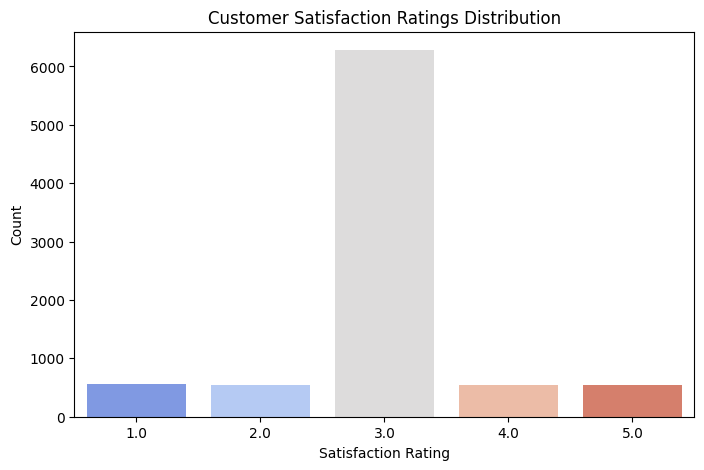

In [20]:
# 1. Customer Satisfaction Ratings Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df_clean['Customer Satisfaction Rating'], palette="coolwarm")
plt.title("Customer Satisfaction Ratings Distribution")
plt.xlabel("Satisfaction Rating")
plt.ylabel("Count")
plt.show()

This count plot shows the distribution of customer satisfaction ratings. It helps identify how many tickets fall into each satisfaction category (e.g., 1, 2, 3, 4, 5). This visualization is useful for understanding the overall satisfaction trend among customers.

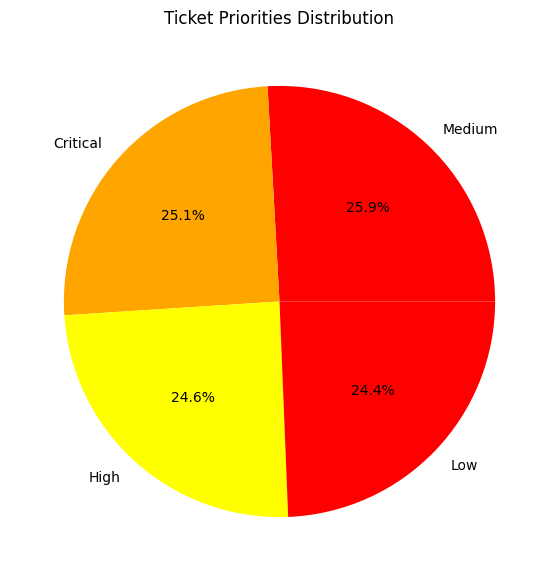

In [21]:
# 2. Ticket Priorities Distribution
plt.figure(figsize=(7, 7))
df['Ticket Priority'].value_counts().plot.pie(autopct="%1.1f%%", colors=["red", "orange", "yellow"])
plt.title("Ticket Priorities Distribution")
plt.ylabel("")
plt.show()

This pie chart shows the distribution of different ticket types. Each slice represents a ticket type, and the size of the slice corresponds to the proportion of tickets of that type in the dataset. It provides a clear visual representation of the prevalence of each ticket type.

C:\Users\tadip\AppData\Local\Temp\ipykernel_18552\1440940150.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Ticket Channel'], order=df['Ticket Channel'].value_counts().index, palette="viridis")


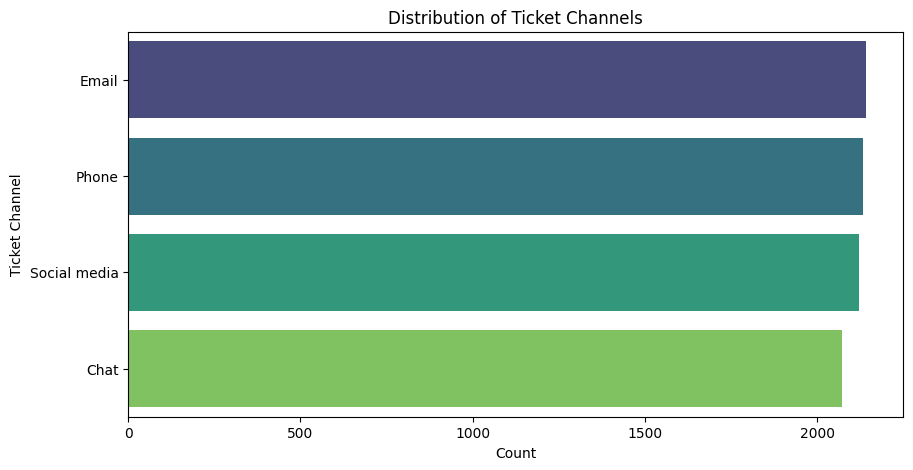

In [22]:
# 3. Ticket Channels Usage
plt.figure(figsize=(10, 5))
sns.countplot(y=df['Ticket Channel'], order=df['Ticket Channel'].value_counts().index, palette="viridis")
plt.title("Distribution of Ticket Channels")
plt.xlabel("Count")
plt.ylabel("Ticket Channel")
plt.show()

This horizontal bar graph shows the usage of different ticket channels. It provides a clear comparison of how many tickets are submitted through each channel.

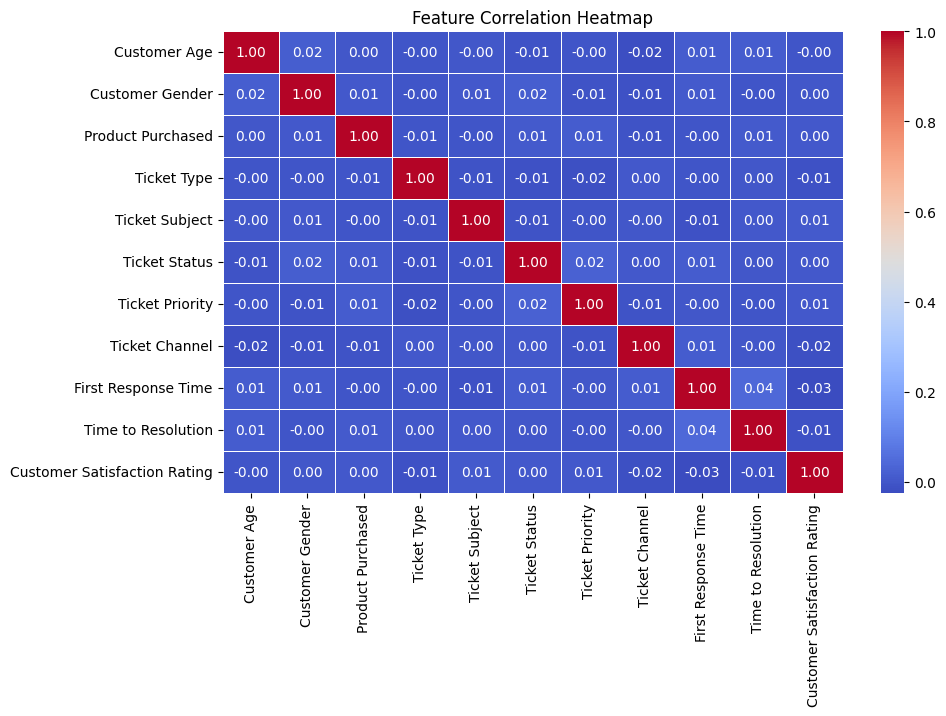

In [23]:
# 4. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

The correlation matrix heatmap displays the correlation between different features in the dataset. It helps identify which features are strongly correlated with each other, which can be useful for feature selection or understanding relationships between variables.

In [24]:
# 5. Feature Importance
feature_importances = model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importances)

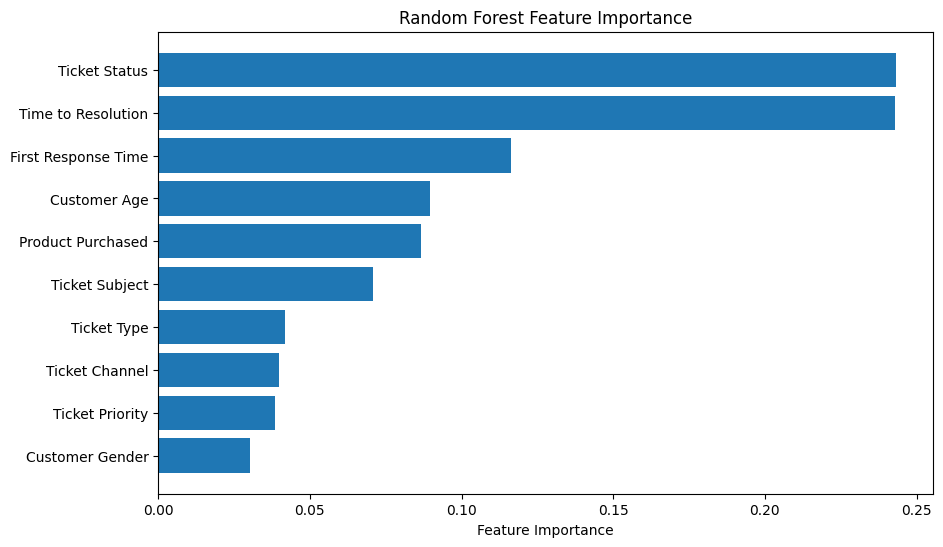

In [25]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

This bar chart shows the importance of each feature as determined by the Random Forest Classifier. It helps identify which features are most influential in predicting customer satisfaction ratings. This can guide further analysis or feature engineering efforts.

This project aims to analyze customer satisfaction based on a dataset of customer support tickets (customer_support_tickets.csv). The analysis includes data cleaning, preprocessing, visualization, and the development of a predictive model using a Random Forest Classifier.

Data Loading and Inspection: The dataset was loaded using pandas, and initial steps involved exploring its structure, data types, and missing values.

Data Cleaning and Preprocessing: Unnecessary columns (Ticket ID, Customer Name, Customer Email, Ticket Description, Resolution, Date of Purchase) were dropped. Time-related columns were converted to numerical values, and missing values were imputed using the median.

Feature Encoding: Categorical features were encoded into numerical format using Label Encoding to make them suitable for the machine-learning model.

Data Visualization: Visualizations were performed to understand the data distribution and relationships between features. Key visualizations included:

1. Distribution of Customer Satisfaction Ratings (countplot)

2. Correlation Matrix (heatmap)

3. Feature Importances (barplot)

4. Ticket Type Distribution (pie chart)

5. Ticket Priority Distribution (pie chart)

6. Ticket Channel Usage (horizontal bar graph)

Model Development and Evaluation: The dataset was split into training and testing sets. A Random Forest Classifier was trained on the training data and used to predict customer satisfaction ratings on the test data.

Performance Evaluation: The model's performance was evaluated using metrics such as accuracy, classification report, and confusion matrix. The accuracy was found to be approximately 72%. The classification report provided precision, recall, and F1-score for each satisfaction rating category. The confusion matrix visualized the model's performance in classifying each category.

Key Findings and Insights:
1. The distribution of customer satisfaction ratings showed the frequency of each rating category.

2. The correlation matrix helped identify relationships between different features in the dataset.

3. Feature importance analysis revealed which factors had the most significant influence on customer satisfaction predictions.

4. The most used ticket channels can be identified to improve customer support.

Conclusion:
The project successfully implemented a machine learning model to predict customer satisfaction based on customer support ticket data. The visualizations provided valuable insights into the factors influencing customer satisfaction. The model achieved an accuracy of 72%, indicating its potential for predicting customer satisfaction ratings. However, the classification report and confusion matrix highlighted areas for improvement, particularly in accurately predicting lower satisfaction ratings.